### import relevant libraries

In [1]:
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import numpy as np

from pathlib import Path

import librosa

import librosa.display

import glob

import IPython

In [7]:
path2 = "/Users/vuppala/Documents/fastai/urbansounds4/"

path3 = "/Users/vuppala/Documents/fastai/urbansounds5/"

In [8]:
files2 = os.listdir(path2)

In [101]:
#defining pattern to caputre the folder name as well as the file number using regular expressions
pat = re.compile(r'(\w+)-\w+-\d+-(\d+)-a.wav')

In [136]:
### moving all the files in the folder into separate train and test folders inside of their respective class folders like airport, park, metro etc.
for i in files2:
    folder_name = pat.findall(i)[0][0]
    file_name = pat.findall(i)[0][1]
    if int(file_name) < 6122:
        os.makedirs(path2 + folder_name + "/train", exist_ok = True)
        os.rename(path2+i, path2+folder_name+"/train"+"/"+file_name+".wav")
    else:
        os.makedirs(path2 + folder_name + "/valid", exist_ok = True)
        os.rename(path2+i, path2+folder_name+"/valid"+"/"+file_name+".wav")

In [104]:
#playing sample file
IPython.display.Audio(path+"airport/"+"322.wav")

In [13]:
classes = ['airport', 'metro', 'park', 'shopping_mall', 'street_traffic', 'bus', 'metro_station', 'public_square', 'street_pedestrian', 'tram']

In [27]:
## function to convert all the .wav files into mel spectograms (stored as .png files) using librosa library, and then storing them into a separate folder with the same folder structure as the one created above
def melspec(fold, sets):

    directory = path2+fold+"/"+sets
    directory2 = path3+fold+"/"+sets
    for i in os.listdir(directory):
        samples, sample_rate = librosa.load(directory+"/"+i)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        
        os.makedirs(directory2, exist_ok = True)
        filename  = (directory2+"/"+i).replace('.wav','.png')

        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)

        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)

        plt.close('all')

In [38]:
for i in classes:
    melspec(i, "train")
    melspec(i, "test")

After all the above steps, zip the folder with the .png files into google compute engine location so as to run the programs from there on

## Appendix

In [97]:
paths = Path("/Users/vuppala/Documents/fastai/urbansounds4/airport/train/")
paths2 = Path("/Users/vuppala/Documents/fastai/urbansounds5/airport/train/")

Using the glob package here instead of like above where we use os.listdir. I think they both work just fine as far as this task is considered

In [98]:
for audio_file in list(Path(paths).glob('*.wav')):
    samples, sample_rate = librosa.load(audio_file)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename  = paths2/Path(audio_file).name.replace('.wav','.png')
    print (audio_file)
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

/Users/vuppala/Documents/fastai/urbansounds4/airport/train/249.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/275.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/513.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/507.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/261.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/16.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/103.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/117.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/498.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/329.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/301.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/467.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/473.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/315.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/472.

/Users/vuppala/Documents/fastai/urbansounds4/airport/train/202.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/564.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/61.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/75.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/49.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/148.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/160.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/174.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/389.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/438.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/404.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/362.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/376.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/410.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/377.wa

/Users/vuppala/Documents/fastai/urbansounds4/airport/train/158.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/170.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/164.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/71.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/65.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/59.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/548.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/560.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/206.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/212.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/574.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/592.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/586.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/579.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/551.wa

/Users/vuppala/Documents/fastai/urbansounds4/airport/train/392.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/386.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/351.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/437.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/423.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/345.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/379.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/378.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/422.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/344.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/350.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/436.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/387.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/393.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/84.

/Users/vuppala/Documents/fastai/urbansounds4/airport/train/20.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/109.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/135.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/121.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/492.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/486.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/479.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/337.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/451.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/445.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/323.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/444.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/322.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/336.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/train/450.

In [99]:
paths = Path("/Users/vuppala/Documents/fastai/urbansounds4/airport/test/")
paths2 = Path("/Users/vuppala/Documents/fastai/urbansounds5/airport/test/")

In [100]:
for audio_file in list(Path(paths).glob('*.wav')):
    samples, sample_rate = librosa.load(audio_file)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename  = paths2/Path(audio_file).name.replace('.wav','.png')
    print (audio_file)
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6273.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6267.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6298.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6307.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6313.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6139.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6138.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6312.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6306.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6299.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6266.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6272.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6264.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6270.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6258

/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6191.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6185.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6152.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6146.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6378.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6350.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6344.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6218.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6224.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6230.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6226.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6232.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6352.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6346.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6385

/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6296.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6282.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6255.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6241.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6269.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6257.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6243.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6294.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6280.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6323.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6337.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6135.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6134.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6336.wav
/Users/vuppala/Documents/fastai/urbansounds4/airport/test/6322

All the below steps were attempts at creating the above steps

In [20]:
 directory = path2+"airport"+"/"+"train"

In [22]:
os.listdir(directory)[:10]

['249.wav',
 '275.wav',
 '513.wav',
 '507.wav',
 '261.wav',
 '16.wav',
 '103.wav',
 '117.wav',
 '498.wav',
 '329.wav']

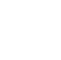

In [24]:
samples, sample_rate = librosa.load(directory + "/" + '249.wav' )
fig = plt.figure(figsize=[0.72,0.72])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [25]:
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)

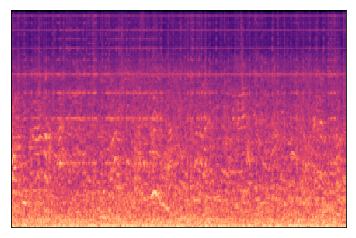

In [26]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [28]:
melspec("park", "train")

melspec("park", "test")

In [37]:
classes2 = ['park'
 'airport',
 'metro',
 'shopping_mall',
 'street_traffic',
 'bus',
 'metro_station',
 'public_square',
 'street_pedestrian',
 'tram']

In [38]:
for i in classes2:
    melspec(i, "train")
    melspec(i, "test")

In [64]:
abc = os.listdir(paths)

In [65]:
abc.sort()

In [71]:
abc[5]

'102.wav'

In [82]:
paths = Path("/Users/vuppala/Documents/fastai/urbansounds4/airport/train/")
paths2 = Path("/Users/vuppala/Documents/fastai/urbansounds5/airport/train/")
for i in os.listdir(paths):
    samples, sample_rate = librosa.load(paths+"/"+i)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    filename  = (paths2+"/"+i).replace('.wav','.png')

    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)

    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)

    plt.close('all')

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'